In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

In [4]:
rating = pd.read_csv("EBOOK-RATING-WITH-USERS-AND-TITLE.csv", delimiter=";")

In [6]:
rating.head()

,id,judul,deskripsi,user_id,rating
0,1197,"EDEN IN THE EAST SURGA DI TIMUR,STEPHEN OPPENH...",Buku ini diterbitkan untuk menambah wawasan pa...,311,5.0
1,1209,24416 NASKAH DEPARTEMEN TENTANG MATA KULIAH MA...,Buku ini diterbitkan untuk menambah wawasan pa...,1631,4.0
2,1210,24418 NASKAH DEPARTEMEN TENTANG MATA KULIAH MA...,Buku ini diterbitkan untuk menambah wawasan pa...,1631,5.0
3,1234,BUKU PETUNJUK PELAKSANAAN PEDOMAN PENGAMANAN P...,Buku ini diterbitkan untuk menambah wawasan pa...,1994,2.0
4,1236,BUKU PETUNJUK PELAKSANAAN PEDOMAN PENYIAPAN SA...,Buku ini diterbitkan untuk menambah wawasan pa...,3090,5.0


In [7]:
rating.describe()

,id,user_id,rating
count,1194.000000,1194.00000,1194.000000
mean,4084.902010,2451.91876,4.859296
std,1672.536732,651.20833,0.435593
min,1197.000000,276.00000,1.000000
25%,2281.250000,1860.25000,5.000000
50%,4724.000000,2962.00000,5.000000
75%,5581.000000,3044.00000,5.000000
max,5785.000000,3156.00000,5.000000


In [9]:
rev_rating = rating['rating'].value_counts()
rev_rating

5.0    1061
4.0     103
3.0      26
2.0       3
1.0       1
Name: rating, dtype: int64

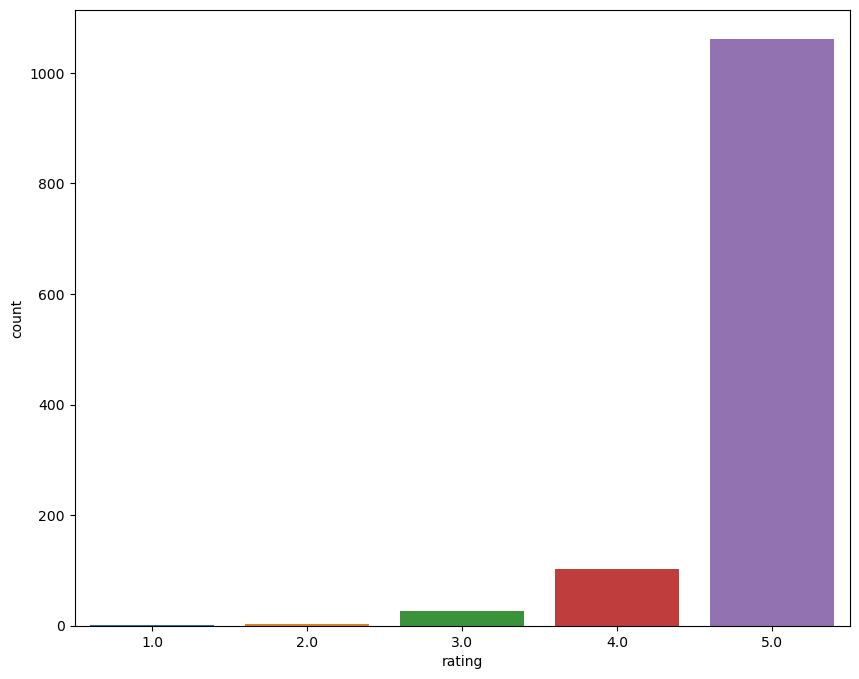

In [10]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="rating", data=rating)

In [14]:
reader = Reader()
data = Dataset.load_from_df(rating[['id', 'user_id', 'rating']], reader)

In [15]:
data

In [41]:
#Train : Test = 80:20
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.15, random_state=50)

In [59]:
#KNN with pearson similarity
sim_options = {'name': 'pearson_baseline','shrinkage': 0}
algo = KNNBasic(sim_options=sim_options)
algo_knn = KNNBasic(k=50, sim_options=sim_options)
prediction_knn = algo_knn.fit(trainset).test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [60]:
prediction_knn

[Prediction(uid=5217, iid=1800, r_ui=4.0, est=4.8579881656804735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=5568, iid=1999, r_ui=5.0, est=4.8579881656804735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=5150, iid=2962, r_ui=5.0, est=4.8579881656804735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=5772, iid=3056, r_ui=5.0, est=4.999999999999999, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=5506, iid=3044, r_ui=5.0, est=4.8579881656804735, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid=4148, iid=1947, r_ui=5.0, est=4.481835550368884, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=5366, iid=3029, r_ui=2.0, est=4.8579881656804735, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=5672, iid=1811, r_ui=5.0, est=4.857988165680

In [61]:
# Tes rekomendasinya
recom_knn = algo_knn.predict(uid=4943,iid=3124, r_ui=4.0)
recom_knn

Prediction(uid=4943, iid=3124, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False})

In [62]:
accuracy.mae(prediction_knn)
accuracy.fcp(prediction_knn)
accuracy.rmse(prediction_knn)

MAE:  0.2438
FCP:  0.7042
RMSE: 0.5046


0.504565097825184

In [57]:
trainset

In [63]:
# Let's create the User Book Df:
user_book_df = rating.pivot_table(index=["user_id"], columns=["judul"], values="rating")

# There are 161 movies that 154 users have rated for. 
user_book_df.shape

(177, 569)

In [64]:
user_book_df.head(10)

judul,10 Kisah Genocide,10 November 45 Mengapa Inggris Membom Surabaya,10 SECRETS OF SUCCESSFUL LEADERS,100 HIKMAH RAMADHAN,100 KESIAPSIAGAAN BEKANGDAM JAYA DALAM MANAJEMENT RISK APPROACH,100 Kebiasaan Orang Sukses,100 Pemimpin Militer yang Berpengaruh di Dalam Sejarah Dunia,100 Tokoh Intelijen Dunia,100 Tokoh Paling Berpengaruh Sepanjang Masa,1001 CARA CEPAT NAIK PANGKAT,...,Wawasan Politik Mengenai Sistem Pendidikan Nasional,West Irian is Indonesian Territory & The Second Great War,Wilayah Kekerasan di Jakarta,Worldclass Manufacturing Dekade Mendatang,YOU ARE A LEADER!,Yahudi Zionis Kapitalis,Yayasan Undang-Undang No.28 Tahun 2004 Tentang perubahan UU. No. 16 Tahun 2001,Yok Koeswoyo,Yuridiksi Peradilan Militer Terhadap Anggota Tentara Nasional Indonesia yang Melakukan Tindak Pidana Umum,Zionis Islael dan Kebangkitan Nasionalisme Arab
user_id,,,,,,,,,,,,,,,,,,,,,
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
